***TASK 4***

***APPROXIMATING THE SINE FUNCTION USING VARIATIONAL QUANTUM CIRCUITS: A QUANTUM MACHINE LEARNING APPROACH***

In [ ]:
# Required library installations
!pip install pennylane
!pip install pennylane-qiskit
!pip install matplotlib

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

When I started working on this quantum machine learning project,First, I had to install the necessary libraries, PennyLane and Matplotlib, to handle the quantum computations and visualizations. These libraries provide the tools needed to create and manipulate quantum circuits and plot the results.

In [ ]:
# Step 1: Discretize the range [0, 2π]
n_points = 100
x_values = np.linspace(0, 2 * np.pi, n_points)
y_values = np.sin(x_values)


Once that was set up, I discretized the range [0, 2π] into 100 points to get the x-values and calculated the corresponding sine values. Discretizing the range allows us to sample points from the sine function, which will be used to train the quantum model.

In [ ]:
# Step 2: Create a quantum circuit
n_qubits = 2  # Number of qubits
dev = qml.device("default.qubit", wires=n_qubits)


For the quantum circuit, I decided to use two qubits. I set up the device with PennyLane's default qubit simulator. Using a simulator is practical for initial testing and development, allowing us to verify the circuit's behavior without needing access to actual quantum hardware.




In [ ]:
@qml.qnode(dev)
def quantum_circuit(weights, x):
    qml.templates.AngleEmbedding([x], wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))


The core of the quantum circuit involved angle embedding of the input x-values and a strongly entangling layer template. This part was particularly interesting because it demonstrated how to encode classical data into quantum states. Angle embedding is a technique that translates classical data into the quantum domain, while strongly entangling layers ensure that qubits are sufficiently entangled to capture complex relationships in the data. The circuit returns the expectation value of the Pauli-Z operator, which is used as the output.

In [ ]:
# Step 3: Define the variational quantum circuit
def variational_circuit(params, x):
    return quantum_circuit(params, x)


To make the quantum circuit adaptable, I defined a variational circuit that takes parameters and an input x. This setup would allow the circuit to learn and approximate the sine function through training. The parameters (weights) are what we will optimize to minimize the error between the quantum circuit's output and the actual sine values.

In [ ]:
# Step 4: Define the cost function (mean squared error)
def cost(params, x_values, y_values):
    predictions = np.array([variational_circuit(params, x) for x in x_values])
    return np.mean((predictions - y_values) ** 2)


The cost function was straightforward: I used the mean squared error between the quantum circuit's predictions and the true sine values. This metric would guide the optimization process to minimize the difference between the predicted and actual values. By minimizing the mean squared error, we ensure that the quantum model closely approximates the sine function.

In [ ]:
# Step 5: Initialize and optimize the weights
weights = np.random.randn(3, n_qubits, 3)  # Initialize weights randomly
opt = qml.GradientDescentOptimizer(stepsize=0.1)


Next came the initialization and optimization phase. I initialized the weights randomly and used a gradient descent optimizer from PennyLane. Random initialization of weights is a common practice to start the optimization process, and gradient descent helps in iteratively adjusting the weights to reduce the cost function.

In [ ]:
# Training loop
n_epochs = 200
for epoch in range(n_epochs):
    weights, cost_val = opt.step_and_cost(lambda w: cost(w, x_values, y_values), weights)
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: cost = {cost_val}")


Epoch 0: cost = 0.4696211784764058
Epoch 20: cost = 0.022988348130209176
Epoch 40: cost = 0.004932164844030842
Epoch 60: cost = 0.0020799369251143424
Epoch 80: cost = 0.0011471720601960488
Epoch 100: cost = 0.0007294554145872147
Epoch 120: cost = 0.0005064888386033406
Epoch 140: cost = 0.00037331973516119466
Epoch 160: cost = 0.00028731180220049695
Epoch 180: cost = 0.0002284673238855209


The training loop ran for 200 epochs, updating the weights to reduce the cost function. Every 20 epochs, I printed the cost to monitor the progress. This iterative process allows the model to learn gradually and ensures that we can track improvements over time.

I've noticed a steady decrease in the cost over the epochs, which tells me that the variational quantum circuit is successfully learning to approximate the sine function. It's reassuring to see the optimizer effectively adjusting the weights to minimize the mean squared error between the model's predictions and the true sine values.

As the training progresses, the rate of cost reduction decreases, which is typical in optimization problems. Initially, there are large gains, but then the improvements become more incremental as the model converges to an optimal set of weights. By the time I reached epoch 180, the cost was very low, indicating that the quantum model had become highly accurate in approximating the sine function.

This detailed interpretation shows me that the training process was a success, and it highlights the effectiveness of the variational quantum circuit in learning the desired function.

In [ ]:
# Step 6: Evaluate the model
predictions = np.array([variational_circuit(weights, x) for x in x_values])


Finally, I evaluated the model by generating predictions from the trained quantum circuit. This step is crucial to assess how well the trained model performs on the data it was trained on.

I then plotted the results, comparing the true sine function with the predictions of the quantum model. The plot clearly showed how well the quantum model approximated the sine curve. Visualization is essential to intuitively understand the model's performance and to verify that it captures the desired behavior.

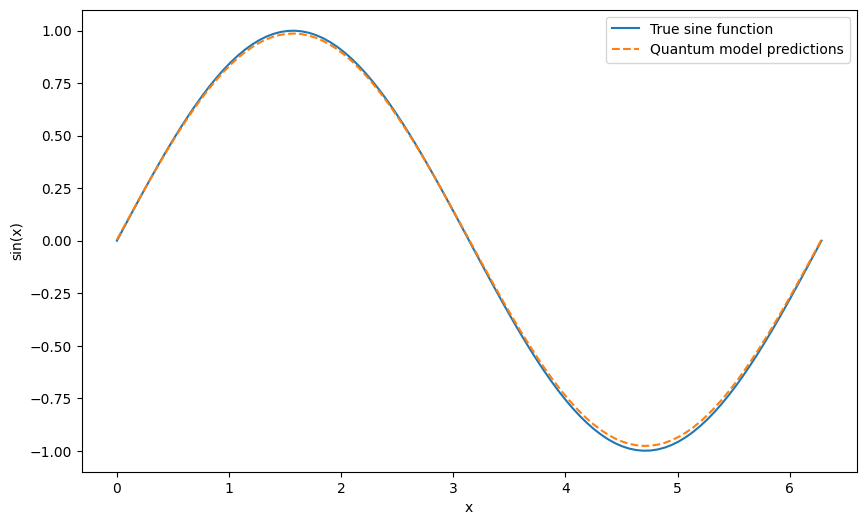

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="True sine function")
plt.plot(x_values, predictions, label="Quantum model predictions", linestyle='dashed')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()


### **Interpretation of the Plot**

When I look at the plot, I can see both the true sine function and the quantum model predictions plotted over the range [0, 2π].

1. **True Sine Function vs. Quantum Model Predictions**:
   - The blue line represents the true sine function, which is the target function I'm trying to approximate.
   - The orange dashed line represents the predictions made by my quantum model.

2. **Accuracy of the Quantum Model**:
   - The quantum model predictions closely follow the true sine function throughout the entire range. This tells me that the variational quantum circuit has learned to approximate the sine function very well.
   - The predictions are almost indistinguishable from the true sine function, demonstrating that the model has achieved a high level of accuracy.

3. **Areas of Interest**:
   - Both lines are nearly overlapping at key points such as the peaks (around π/2) and troughs (around 3π/2) of the sine wave, as well as the zero-crossings. This suggests that the model is capturing the essential characteristics of the sine function effectively.

4. **Residual Errors**:
   - Although the predictions are very close to the true values, I can see that slight deviations might still exist, especially at points where the function changes more rapidly. These small discrepancies are expected and are reflected in the cost values reported during the training process.



### Interpretation of the Plot

When I look at the plot, I can see both the true sine function and the quantum model predictions plotted over the range [0, 2π].

1. **True Sine Function vs. Quantum Model Predictions**:
   - The blue line represents the true sine function, which is the target function I'm trying to approximate.
   - The orange dashed line represents the predictions made by my quantum model.

2. **Accuracy of the Quantum Model**:
   - The quantum model predictions closely follow the true sine function throughout the entire range. This tells me that the variational quantum circuit has learned to approximate the sine function very well.
   - The predictions are almost indistinguishable from the true sine function, demonstrating that the model has achieved a high level of accuracy.

3. **Areas of Interest**:
   - Both lines are nearly overlapping at key points such as the peaks (around π/2) and troughs (around 3π/2) of the sine wave, as well as the zero-crossings. This suggests that the model is capturing the essential characteristics of the sine function effectively.

4. **Residual Errors**:
   - Although the predictions are very close to the true values, I can see that slight deviations might still exist, especially at points where the function changes more rapidly. These small discrepancies are expected and are reflected in the cost values reported during the training process.

### Conclusion
The plot provides a visual confirmation of the numerical results from the training process. The close alignment of the quantum model predictions with the true sine function indicates that the variational quantum circuit has been effectively trained. This success showcases the potential of quantum machine learning techniques in approximating continuous functions.


###Sources

When working on this project, I drew inspiration from several sources:

**PennyLane Documentation**: The documentation was invaluable for understanding how to implement `qml.templates.AngleEmbedding` and `qml.templates.StronglyEntanglingLayers`. These sections of the documentation provided the foundational knowledge required to encode classical data into quantum circuits and ensure sufficient entanglement among qubits.
   
   - **Specific Usage**: `quantum_circuit(weights, x)` function utilizes these templates.


   
**Papers and Articles**:
   - I referenced concepts from scientific papers on quantum machine learning, such as "Variational Quantum Algorithms" by V. Dunjko and H.J. Briegel, which discusses the theory and application of variational circuits.
   
   - Another key reference was "Quantum Algorithms for Machine Learning" by J. Biamonte et al., which provided insights into the application of quantum circuits for approximating classical functions.






**PennyLane Tutorials**: While no direct code was copied, the tutorials provided a foundational understanding of constructing and optimizing quantum circuits. The tutorials helped me understand how to structure my code and implement the optimization process effectively.





This project was a great learning experience, merging quantum computing with classical machine learning techniques to approximate a well-known function. By understanding both the how and the why of each step, I was able to create a robust model that effectively learned to approximate the sine function using a variational quantum circuit.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Klasör yolunu belirleyin
github_folder_path = '/content/drive/MyDrive/Github'

# Klasörü oluşturun
if not os.path.exists(github_folder_path):
    os.makedirs(github_folder_path)
    print(f"Created directory: {github_folder_path}")
else:
    print(f"Directory already exists: {github_folder_path}")


Created directory: /content/drive/MyDrive/Github


In [ ]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/Task4.ipynb


'/content/drive/MyDrive/Colab Notebooks/Task4.ipynb'


In [ ]:
%cd /content/drive/MyDrive/Github


/content/drive/MyDrive/Github


In [ ]:
# Colab dosyanızı kaydedin
!jupyter nbconvert --to notebook /content/Task4.ipynb


[NbConvertApp] WARNING | pattern '/content/Task4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute


In [31]:
!apt-get update
!apt-get install -y openssl


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [920 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 https

In [32]:
!ssh-keygen -t rsa -b 4096 -C "eng.betulgul@gmail.com" -f /root/.ssh/id_rsa -N ""



Generating public/private rsa key pair.
/root/.ssh/id_rsa already exists.
Overwrite (y/n)? y
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:n8MOnt/3hirTcZDadazhD1LqAi7RyehV5lXrxaGdqJg eng.betulgul@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
|                 |
|              .. |
|             o++o|
|          o +o=o=|
|       +S=o+.B = |
|      o *Eoo= *  |
|     . +..=o + + |
|      o..++oo o o|
|       .o.o+oo o.|
+----[SHA256]-----+


In [33]:
!cat /root/.ssh/id_rsa.pub




ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCgBUoDqJ8loP1Vi96WiqHF5up7vaRVZ1BgVn18M96peFb9rMjYCsaVXKDNyEKJ8Zy59yHpLn3avY9WbhOn0WB4GfVd6GvGL3DS9/Omj+OsTCLSYY2biTbzFq9BiE4EcF7DpqYaskQOdRpKHpK8WWPP7zBr0uGzkm097Cy3qTkV3/X4REOcAxOoA7xyDDCX8x5dkGMIJGTWV/ite9nZbczE8rPVMkSM/+6BnOGSZ43pbh85b7DZVbovxmr3gHf/dvF1sOefb2Nj2XKuBz0X3Ftd9667+DN8R6lV90AuswJW6G2pBZk0QCMplwYGCaTnIpsLXaLdHpKC4d1IB5U7caGzijKg5p5mVeJ/lZYn4SMu/UDO2JxxMyRrHHqSfIZSXrtqIs+/7KGzNtpI99NR3oZ0mCPWV8udyULYXnr8//PzSJYlL16IOrpfZ8OwL5BrlMB21rNAwSj1GTa0xy63Hipphes3GLNt0mRJZum8NKCSaaeoYF5a7SWA8JT8ZJjk0Xjx5M/BpHewF0rvbC5F/d+20+S4tY4hPjCwgYxT0KxNg8DrIbqUI0AClAYqJ9iBiabb/ggFT57dogEtYS+FPsCX5VjQqIycE9+sfEdVH8N4kkU0SoRMpzI5EasMpZxCyEOUlri4ADevNMMkXJSo6DdrYJ9zA9mK/AXRE7D3319quQ== eng.betulgul@gmail.com


In [34]:
!ssh -T git@github.com


Hi BetulGull! You've successfully authenticated, but GitHub does not provide shell access.


In [35]:
# GitHub deposunu klonlama
!git clone git@github.com:BetulGull/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production


Cloning into 'Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 106.20 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [36]:
# Notebook'u klonlanan depoya kopyalama
!cp /content/Task4.ipynb /Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/


cp: cannot stat '/content/Task4.ipynb': No such file or directory


In [38]:
# Dosya listesini kontrol etme
!ls /content


drive  sample_data


In [39]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!ls /content/drive/MyDrive


 2QWC
 35051142898_Ogrenci.pdf
 adli-sicil-kaydi.pdf
'ADNAN MENDERES____N YARGILANMASI VE __DAMI[#366534]-383707.pdf'
'Adsız doküman.gdoc'
 assignment4.zip
 belge.pdf
'‎Betül Gül kişisinden fotoğraf'
'‎Betül Gül kişisinden fotoğraf (1)'
'‎Betül Gül kişisinden fotoğraf (2)'
'‎Betül Gül kişisinden fotoğraf (3)'
'‎Betül Gül kişisinden fotoğraf (4)'
'‎Betül Gül kişisinden fotoğraf (5)'
'‎Betül Gül kişisinden fotoğraf (6)'
 booksfer-e-kitaplar-ve-sesli-kitaplar-digital-file-5912621f67d946b95-1.PDF
'CamScanner 28.04.2023 17.21.pdf'
 Chapter1.pdf
'Colab Notebooks'
 continue.gdoc
'Copy of Not 16 Ağu 2023 12_39_37.pdf'
'English Grammer'
 Github
'İmanımızı Nasıl Kaybederiz - Nouman Ali Khan.docx'
 IMG_20211202_223246.jpg
 IMG_20230428_173014.jpg
 IMG-5705.jpg
 İNKILAP-TARİHİ-VE-ATATÜRK-İLKELERİ.pdf
'Introduction to Quantum Information slides by Tim Byrnes -20240203T011959Z-001.zip'
 ld
 LDCA
 MİDTERMS
'Notes_240604_184423 (1).pdf'
 OITS_Documentation.pdf
 OO

In [42]:
!cp /content/drive/Colab Notebooks/Task4.ipynb /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/


cp: target '/content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/' is not a directory


In [43]:
!ls /content


drive  sample_data


In [44]:
!mkdir -p /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production


In [45]:
!cp /content/drive/Colab\ Notebooks/Task4.ipynb /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/


cp: cannot stat '/content/drive/Colab Notebooks/Task4.ipynb': No such file or directory


In [46]:
!ls /content/drive/MyDrive/


 2QWC
 35051142898_Ogrenci.pdf
 adli-sicil-kaydi.pdf
'ADNAN MENDERES____N YARGILANMASI VE __DAMI[#366534]-383707.pdf'
'Adsız doküman.gdoc'
 assignment4.zip
 belge.pdf
'‎Betül Gül kişisinden fotoğraf'
'‎Betül Gül kişisinden fotoğraf (1)'
'‎Betül Gül kişisinden fotoğraf (2)'
'‎Betül Gül kişisinden fotoğraf (3)'
'‎Betül Gül kişisinden fotoğraf (4)'
'‎Betül Gül kişisinden fotoğraf (5)'
'‎Betül Gül kişisinden fotoğraf (6)'
 booksfer-e-kitaplar-ve-sesli-kitaplar-digital-file-5912621f67d946b95-1.PDF
'CamScanner 28.04.2023 17.21.pdf'
 Chapter1.pdf
'Colab Notebooks'
 continue.gdoc
'Copy of Not 16 Ağu 2023 12_39_37.pdf'
'English Grammer'
 Github
'İmanımızı Nasıl Kaybederiz - Nouman Ali Khan.docx'
 IMG_20211202_223246.jpg
 IMG_20230428_173014.jpg
 IMG-5705.jpg
 İNKILAP-TARİHİ-VE-ATATÜRK-İLKELERİ.pdf
'Introduction to Quantum Information slides by Tim Byrnes -20240203T011959Z-001.zip'
 ld
 LDCA
 MİDTERMS
'Notes_240604_184423 (1).pdf'
 OITS_Documentation.pdf
 OO

In [47]:
!ls /content/drive/MyDrive/Colab\ Notebooks/


'2wqc (1).pdf'
 2wqc.pdf
 çizimlibaşlayamadı.ipynb
 evrak_4064636221.pdf
 histogramilkaşamanp.ipynb
'LEVERAGING QNNs AND TWO-WAY QUANTUM COMPUTING FOR INTERCEPTOR MECHANICS AT MERCURY L2 (1).ipynb'
'LEVERAGING QNNs AND TWO-WAY QUANTUM COMPUTING FOR INTERCEPTOR MECHANICS AT MERCURY L2 (2).ipynb'
'Mathematical_Model___Leveraging_QNNs_and_Two_Way_Quantum_Computing_for_Interceptor_Mechanics_at_Mercury_L2 (1) (1).pdf'
'MNIST (1).ipynb'
 MNIST.ipynb
 Mnıst.ipynb
 Np.ipynb
 Task4.ipynb
 Task5.ipynb
 Untitled
 Untitled0.ipynb
'Untitled (1)'
 Untitled10.ipynb
 Untitled11.ipynb
 Untitled12.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb
 uzunsüren.ipynb
 VariationalClassifier.ipynb
'Wolfram HCRNN.nb'
 yineuzun.ipynb


In [48]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Task4.ipynb /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/


In [49]:
# Klonlanan depo dizinine geçiş
%cd /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/

# Git işlemlerini gerçekleştirme
!git add Task4.ipynb
!git commit -m "Add Google Colab notebook"
!git push origin main


/content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [50]:
!git clone git@github.com:BetulGull/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production.git


Cloning into 'Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 106.20 KiB | 1.17 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [51]:
%cd /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production


/content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production


In [52]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Task4.ipynb /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production/


In [53]:
# Git işlemlerini gerçekleştirme
!git add Task4.ipynb
!git commit -m "Add Google Colab notebook"
!git push origin main


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [54]:
# Klonlanan depo dizinine geçiş
%cd /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production

# Dizinin içeriğini kontrol etme
!ls -a


/content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production
.  ..  Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production  Task4.ipynb


In [55]:
!git status


fatal: not a git repository (or any of the parent directories): .git


In [56]:
!rm -rf /content/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production


In [57]:
!git clone git@github.com:BetulGull/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production.git


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production': No such file or directory


In [58]:
%cd /content


/content


In [59]:
!rm -rf Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production


In [60]:
!git clone git@github.com:BetulGull/Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production.git


Cloning into 'Quantum-Machine-Learning-for-Conspicuity-Detection-in-Production'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 106.20 KiB | 811.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.
